# Data Visualization: Compositions with Pie/Donut charts


## Exercise 1:

Create a pie chart showing the major causes of death of all Roman Emperors.

* Read the data from `roman-emperor-regins.csv`. 
* Count the values for each class in `Cause_of_Death`.
* Create subsets from complete dataset containing only those emperors with causes of death -  assasinated, possibly assassinated, natural death, killed in battle, and combine the rest as 'others'.
* Set colors and labels for chosen classes.
* Explode the slice with highest magnitude, also set the shadows to true.
* Show the percentages in each slice


In [76]:
# Load the dataset and explore the head
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
emp = pd.read_csv('roman-emperor-reigns.csv')
emp.head()

# Emperor	Length_of_Reign	Cause_of_Death
# 0	Augustus	40.58	Possibly assassinated
# 1	Tiberius	22.50	Possibly assassinated
# 2	Caligula	4.83	Assassinated
# 3	Claudius	13.75	Possibly assassinated
# 4	Nero	13.67	Suicide

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


In [77]:
# Count the values for each cuase of death
emp['Cause_of_Death'].value_counts()

# Assassinated             22
# Natural causes           16
# Killed in battle          8
# Possibly assassinated     8
# Suicide                   5
# Illness                   5
# Executed                  3
# Died in captivity         1
# Name: Cause_of_Death, dtype: int64

Assassinated             22
Natural causes           16
Killed in battle          8
Possibly assassinated     8
Suicide                   5
Illness                   5
Executed                  3
Died in captivity         1
Name: Cause_of_Death, dtype: int64

In [78]:
# Create dataframes for each chosen causes of deaths, count the frequency of each cause and count the rest as 'other'

emp_a = emp[emp['Cause_of_Death'].apply(lambda x: x == 'Assassinated' )] # Assassinated
emp_nc = emp[emp['Cause_of_Death'].apply(lambda x: x == 'Natural causes')] # Natural causes
emp_kb = emp[emp['Cause_of_Death'].apply(lambda x: x == 'Killed in battle')] # Killed in battle
emp_pa = emp[emp['Cause_of_Death'].apply(lambda x: x == 'Possibly assassinated' )] # Possibly assassinated

# Calculate the frequency of other causes
other = len(emp) - (len(emp_a)+len(emp_nc)+len(emp_kb)+len(emp_pa))

# Create a values array from lengths of all chosen causes + other
vals = np.array([len(emp_a), len(emp_nc), len(emp_kb), len(emp_pa), other])

# Create a Label array for the pie chart
labels = ['Assassinated', 'Natural causes', 'Killed in battle', 'Possibly assassinated', 'Other']

Above can also be achieved in a simpler way using pandas built in functions.

In [79]:
# Colors for each slice in the pie chart and set explode for Assassinated = 0.1
colors = ['salmon', 'yellowgreen', 'lightblue', 'lightcoral', 'lightgreen']
explode = [0.1, 0,0,0,0]

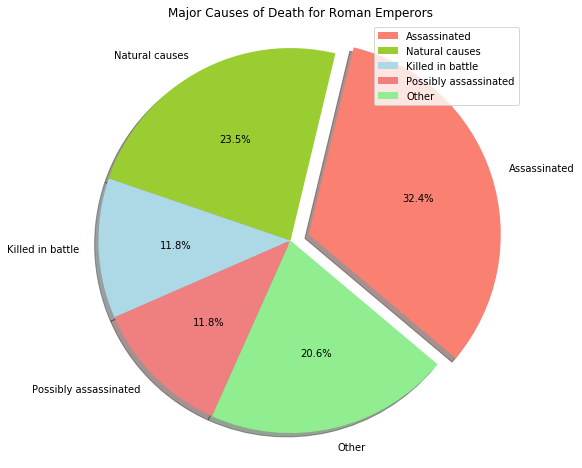

In [81]:
# Create a new figure space with a single axes
fig, ax = plt.subplots(figsize=(8,8))

# Create the pie chart with above data and customize by passing extra arguments
ax.pie(vals, 
        explode=explode,    # Explode values for slices from the explode list
        labels=labels,      
        colors=colors,      # Color values for slices from colors list
        autopct='%1.1f%%',  # Auto percentage - 1 decimal point
        shadow=True,        # Set the drop shadow to true
        startangle=-40)      # Set a start angle 

ax.legend(labels, loc="best")
ax.axis('equal')
ax.set_title( 'Major Causes of Death for Roman Emperors')
plt.show()

# Exercise 2

Convert the the pie chart above into a donut chart using same labels and colours. Show percentages at suitable location and set legend. Rotate the plot for a clear output.  

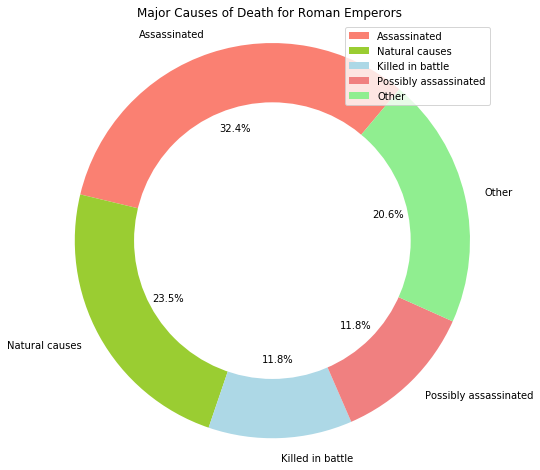

In [72]:
# Create a new figure space with a single axes
fig, ax = plt.subplots(figsize=(8,8))

# Draw a pie chart as seen earlier
ax.pie(vals, colors = colors, labels=labels, autopct='%1.1f%%', startangle=50)

# Draw a white colored circle at origin (0,0) with radius 0.7
centre_circle = plt.Circle((0,0),0.70, fc='white')

# Get a reference to the current figure and add circle to current axes
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal') 
ax.set_title('Major Causes of Death for Roman Emperors ')
plt.legend(loc =1)
plt.show()